In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
cares = pd.read_csv("../data/CARES_encoded_ignorecols.csv")
cares

,GENDER,Anemia category,PreopEGFRMDRD,DaysbetweenDeathandoperation,AnaestypeCategory,PriorityCategory,AGEcategory,Mortality,thirtydaymortality,SurgRiskCategory,...,DMinsulinRCRICategory,CreatinineRCRICategory,GradeofKidneyCategory,RDW15.7,ASAcategorybinned,ICUAdmgt24h,Chinese,Indian,Malay,Perioperativetransfusionwithin30days
0,0,1.0,1,NaN,0,0,2,0,0,0,...,0,0,0.0,0.0,0.0,0,1,0,0,0
1,1,2.0,1,NaN,0,0,3,0,0,1,...,0,0,0.0,0.0,0.0,0,1,0,0,1
2,1,1.0,0,59.0,0,0,3,1,0,0,...,0,0,0.0,1.0,1.0,0,1,0,0,0
3,1,0.0,1,NaN,0,1,2,0,0,0,...,0,0,0.0,0.0,0.0,0,0,1,0,0
4,0,0.0,0,NaN,0,0,1,0,0,1,...,0,0,1.0,0.0,1.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70064,1,0.0,0,NaN,0,0,2,0,0,0,...,0,0,1.0,0.0,1.0,0,0,0,0,0
70065,0,0.0,0,NaN,0,0,4,0,0,0,...,0,0,2.0,0.0,1.0,0,0,0,0,0
70066,0,1.0,0,NaN,0,0,3,0,0,1,...,1,0,2.0,0.0,1.0,0,0,0,0,0
70067,1,2.0,1,NaN,0,1,2,0,0,0,...,1,0,0.0,0.0,NaN,0,0,0,0,0


In [3]:
cares.columns

Index(['GENDER', 'Anemia category', 'PreopEGFRMDRD',
       'DaysbetweenDeathandoperation', 'AnaestypeCategory', 'PriorityCategory',
       'AGEcategory', 'Mortality', 'thirtydaymortality', 'SurgRiskCategory',
       'CVARCRICategory', 'IHDRCRICategory', 'CHFRCRICategory',
       'DMinsulinRCRICategory', 'CreatinineRCRICategory',
       'GradeofKidneyCategory', 'RDW15.7', 'ASAcategorybinned', 'ICUAdmgt24h',
       'Chinese', 'Indian', 'Malay', 'Perioperativetransfusionwithin30days'],
      dtype='object')

In [4]:
len(cares.columns)

23

In [5]:
cares.dtypes

GENDER                                    int64
Anemia category                         float64
PreopEGFRMDRD                             int64
DaysbetweenDeathandoperation            float64
AnaestypeCategory                         int64
PriorityCategory                          int64
AGEcategory                               int64
Mortality                                 int64
thirtydaymortality                        int64
SurgRiskCategory                          int64
CVARCRICategory                           int64
IHDRCRICategory                           int64
CHFRCRICategory                           int64
DMinsulinRCRICategory                     int64
CreatinineRCRICategory                    int64
GradeofKidneyCategory                   float64
RDW15.7                                 float64
ASAcategorybinned                       float64
ICUAdmgt24h                               int64
Chinese                                   int64
Indian                                  

In [6]:
RANDOM_SEED = 3402

In [7]:
np.random.seed(RANDOM_SEED)

In [8]:
from sklearn.model_selection import train_test_split

# Mortality

In [9]:
feature_columns = [
    'GENDER',
    'Anemia category',
    'PreopEGFRMDRD',
    'AnaestypeCategory',
    'PriorityCategory',
    'AGEcategory',
    'SurgRiskCategory',
    'CVARCRICategory',
    'IHDRCRICategory',
    'CHFRCRICategory',
    'DMinsulinRCRICategory',
    'CreatinineRCRICategory',
    'GradeofKidneyCategory',
    'RDW15.7',
    'ASAcategorybinned',
    'Chinese',
    'Indian',
    'Malay',
    'Perioperativetransfusionwithin30days'
]

mortality_cares = cares[feature_columns + ['Mortality']]

In [10]:
mortality_cares.dropna(how='any')

,GENDER,Anemia category,PreopEGFRMDRD,AnaestypeCategory,PriorityCategory,AGEcategory,SurgRiskCategory,CVARCRICategory,IHDRCRICategory,CHFRCRICategory,DMinsulinRCRICategory,CreatinineRCRICategory,GradeofKidneyCategory,RDW15.7,ASAcategorybinned,Chinese,Indian,Malay,Perioperativetransfusionwithin30days,Mortality
0,0,1.0,1,0,0,2,0,0,0,0,0,0,0.0,0.0,0.0,1,0,0,0,0
1,1,2.0,1,0,0,3,1,0,0,0,0,0,0.0,0.0,0.0,1,0,0,1,0
2,1,1.0,0,0,0,3,0,0,0,0,0,0,0.0,1.0,1.0,1,0,0,0,1
3,1,0.0,1,0,1,2,0,0,0,0,0,0,0.0,0.0,0.0,0,1,0,0,0
4,0,0.0,0,0,0,1,1,0,0,0,0,0,1.0,0.0,1.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70062,0,0.0,0,0,0,2,1,0,0,0,0,0,1.0,0.0,0.0,1,0,0,0,0
70063,1,0.0,0,0,1,2,1,0,0,0,0,0,1.0,0.0,1.0,1,0,0,0,0
70064,1,0.0,0,0,0,2,0,0,0,0,0,0,1.0,0.0,1.0,0,0,0,0,0
70065,0,0.0,0,0,0,4,0,0,0,0,0,0,2.0,0.0,1.0,0,0,0,0,0


In [11]:
percent_missing = mortality_cares.isna().sum() / len(mortality_cares)
missing_value_df = pd.DataFrame({
    'column_name': mortality_cares.columns,
    'percent_missing': percent_missing
}).reset_index(drop=True)

missing_value_df

,column_name,percent_missing
0,GENDER,0.000000
1,Anemia category,0.002697
2,PreopEGFRMDRD,0.000000
3,AnaestypeCategory,0.000000
4,PriorityCategory,0.000000
5,AGEcategory,0.000000
6,SurgRiskCategory,0.000000
7,CVARCRICategory,0.000000
8,IHDRCRICategory,0.000000
9,CHFRCRICategory,0.000000


In [12]:
# All remaining NaN less than 5%. drop rows with nan value(s).
mortality_cares.dropna(how='any', inplace=True)

/var/folders/d_/43yhfw3n2wx5mg7dg0cxjld00000gn/T/ipykernel_2331/4257491261.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mortality_cares.dropna(how='any', inplace=True)


In [13]:
mortality_X = mortality_cares.drop('Mortality', axis=1)
mortality_y = mortality_cares['Mortality']

In [14]:
mortality_x_train, mortality_x_test, mortality_y_train, mortality_y_test = train_test_split(mortality_X, mortality_y, test_size=0.3, random_state=RANDOM_SEED, stratify=mortality_y)

In [15]:
mortality_y_train.value_counts(normalize=True)

Mortality
0    0.924786
1    0.075214
Name: proportion, dtype: float64

In [16]:
from imblearn.over_sampling import SMOTE

In [17]:
mortality_x_res, mortality_y_res = SMOTE(random_state=RANDOM_SEED).fit_resample(mortality_x_train, mortality_y_train)

In [18]:
model_evaluations = {}

### Simple Models
- Logistic Regression
- Random Forest
- XGBoost

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [20]:
from sklearn.metrics import f1_score, roc_curve, auc, classification_report, precision_recall_curve, confusion_matrix

In [21]:
simple_models = {}

simple_models['Logistic Regression'] = LogisticRegression(random_state=RANDOM_SEED)
simple_models['Random Forest'] = RandomForestClassifier(random_state=RANDOM_SEED)

# apply the same for smote data
simple_models['Logistic Regression SMOTE'] = LogisticRegression(random_state=RANDOM_SEED)
simple_models['Random Forest SMOTE'] = RandomForestClassifier(random_state=RANDOM_SEED)

simple_models['XGBoost'] = XGBClassifier(random_state=RANDOM_SEED)
simple_models['XGBoost SMOTE'] = XGBClassifier(random_state=RANDOM_SEED)

In [22]:
simple_models['Logistic Regression'].fit(mortality_x_train, mortality_y_train)
simple_models['Logistic Regression SMOTE'].fit(mortality_x_res, mortality_y_res)

simple_models['Random Forest'].fit(mortality_x_train, mortality_y_train)
simple_models['Random Forest SMOTE'].fit(mortality_x_res, mortality_y_res)

simple_models['XGBoost'].fit(mortality_x_train, mortality_y_train)
simple_models['XGBoost SMOTE'].fit(mortality_x_res, mortality_y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=3402, ...)

Model: Logistic Regression
F1 Score: 0.2025862068965517
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     18375
           1       0.52      0.13      0.20      1494

    accuracy                           0.93     19869
   macro avg       0.73      0.56      0.58     19869
weighted avg       0.90      0.93      0.90     19869

AUC Score: 0.8473007676966369


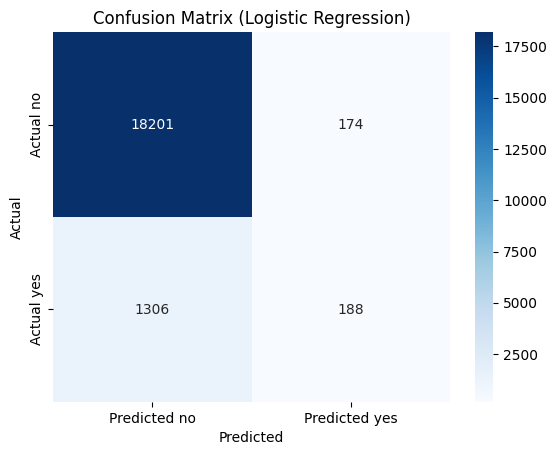

Model: Random Forest
F1 Score: 0.23376623376623376
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     18375
           1       0.38      0.17      0.23      1494

    accuracy                           0.92     19869
   macro avg       0.66      0.57      0.59     19869
weighted avg       0.89      0.92      0.90     19869

AUC Score: 0.7942748772869255


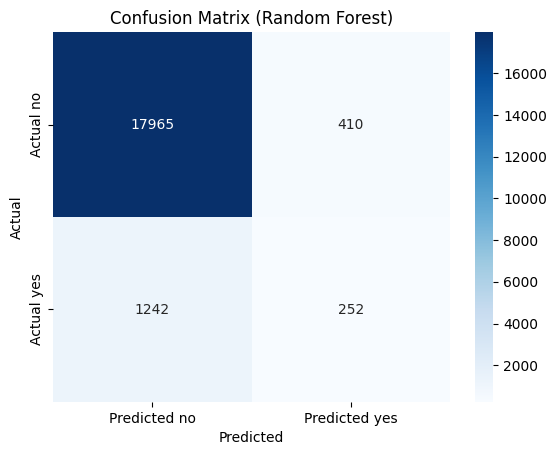

Model: Logistic Regression SMOTE
F1 Score: 0.3234893230349841
              precision    recall  f1-score   support

           0       0.97      0.78      0.87     18375
           1       0.21      0.71      0.32      1494

    accuracy                           0.78     19869
   macro avg       0.59      0.75      0.59     19869
weighted avg       0.91      0.78      0.82     19869

AUC Score: 0.8314441074957426


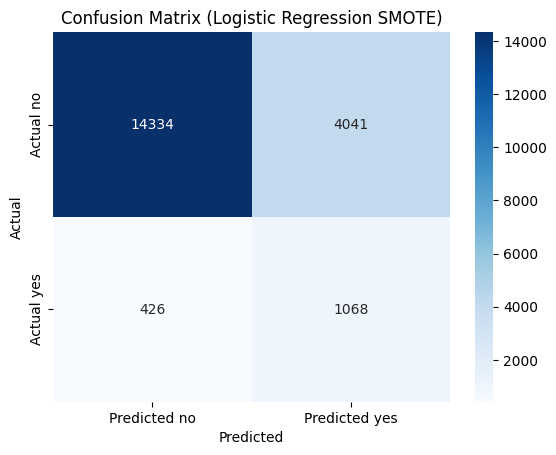

Model: Random Forest SMOTE
F1 Score: 0.2817497648165569
              precision    recall  f1-score   support

           0       0.95      0.88      0.91     18375
           1       0.22      0.40      0.28      1494

    accuracy                           0.85     19869
   macro avg       0.58      0.64      0.60     19869
weighted avg       0.89      0.85      0.87     19869

AUC Score: 0.7385499549217277


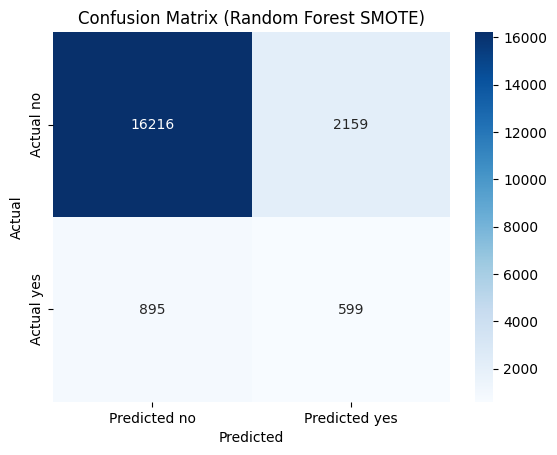

Model: XGBoost
F1 Score: 0.23269809428284854
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     18375
           1       0.46      0.16      0.23      1494

    accuracy                           0.92     19869
   macro avg       0.70      0.57      0.60     19869
weighted avg       0.90      0.92      0.90     19869

AUC Score: 0.8483644145743975


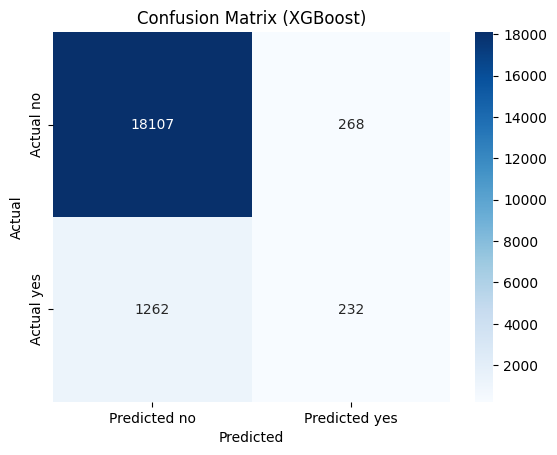

Model: XGBoost SMOTE
F1 Score: 0.3315660685154976
              precision    recall  f1-score   support

           0       0.96      0.86      0.91     18375
           1       0.24      0.54      0.33      1494

    accuracy                           0.84     19869
   macro avg       0.60      0.70      0.62     19869
weighted avg       0.90      0.84      0.86     19869

AUC Score: 0.7942877359779252


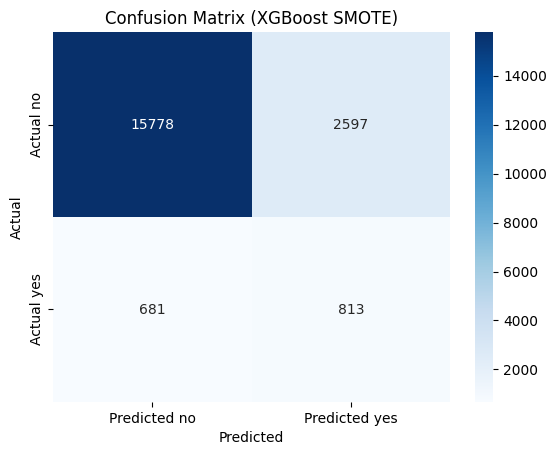

In [23]:
for model_name in simple_models:
    print(f"Model: {model_name}")
    y_pred = simple_models[model_name].predict(mortality_x_test)
    y_pred_proba = simple_models[model_name].predict_proba(mortality_x_test)[:, 1]

    print(f"F1 Score: {f1_score(mortality_y_test, y_pred)}")
    print(classification_report(mortality_y_test, y_pred))
    fpr, tpr, _ = roc_curve(mortality_y_test, y_pred_proba)
    print(f"AUC Score: {auc(fpr, tpr)}")
    conf_mat = pd.DataFrame(confusion_matrix(mortality_y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix ({model_name})')
    plt.show()

    prec, rec, _ = precision_recall_curve(mortality_y_test, y_pred_proba)
    model_evaluations[model_name] = {
        "fpr": fpr,
        "tpr": tpr,
        "precision": prec,
        "recall": rec
    }

## Neural Network Model
Using TensorFlow

In [24]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

### Non-SMOTE

In [25]:
model = Sequential()
model.add(Input((mortality_X.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [26]:
model.compile("adam", "binary_crossentropy", metrics=["f1_score", "auc"])

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
history = model.fit(mortality_x_train, mortality_y_train, epochs=10, batch_size=32, validation_data=(mortality_x_test, mortality_y_test))

Epoch 1/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - auc: 0.6810 - f1_score: 0.1390 - loss: 0.2625 - val_auc: 0.8434 - val_f1_score: 0.1399 - val_loss: 0.2055
Epoch 2/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - auc: 0.8506 - f1_score: 0.1404 - loss: 0.2032 - val_auc: 0.8516 - val_f1_score: 0.1399 - val_loss: 0.2024
Epoch 3/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - auc: 0.8516 - f1_score: 0.1414 - loss: 0.2027 - val_auc: 0.8536 - val_f1_score: 0.1399 - val_loss: 0.2014
Epoch 4/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - auc: 0.8581 - f1_score: 0.1417 - loss: 0.2005 - val_auc: 0.8556 - val_f1_score: 0.1399 - val_loss: 0.2008
Epoch 5/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - auc: 0.8558 - f1_score: 0.1397 - loss: 0.1999 - val_auc: 0.8559 - val_f1_score: 0.1399 - val_loss: 0.2025
Epoch 6/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - auc: 0.8646 - f1_score: 0.1413 - loss: 0.1969 - val_auc: 0.8550 - val_f1_score: 0.1399 - val_loss: 0.2026
Epoch 7/10
1449/

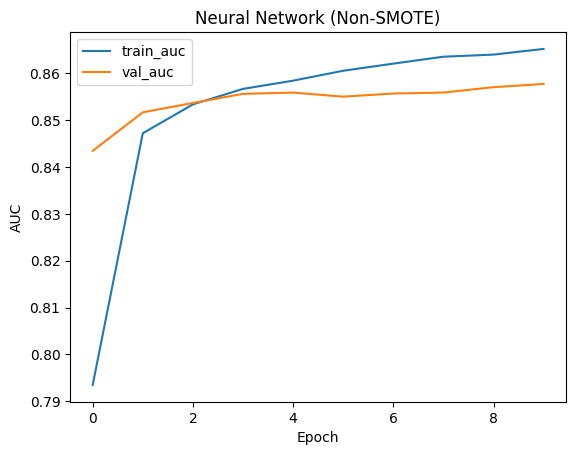

In [29]:
plt.title("Neural Network (Non-SMOTE)")
plt.plot(history.history["auc"], label="train_auc")
plt.plot(history.history["val_auc"], label="val_auc")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()

In [30]:
y_pred_proba = model.predict(mortality_x_test)

621/621 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [31]:
y_pred = np.where(y_pred_proba >= 0.5, 1, 0)

In [32]:
f1_score(mortality_y_test, y_pred)

0.21722846441947566

In [33]:
fpr, tpr, _ = roc_curve(mortality_y_test, y_pred_proba)
auc(fpr, tpr)

0.858018723419756

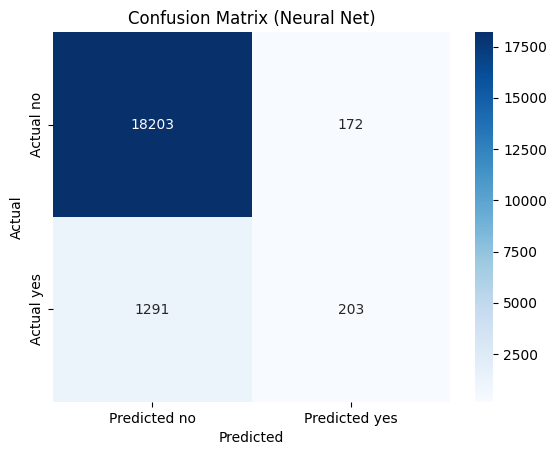

In [34]:
conf_mat = pd.DataFrame(confusion_matrix(mortality_y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Neural Net)')
plt.show()

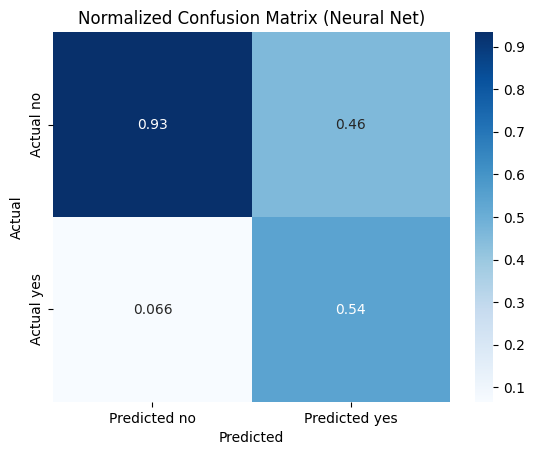

In [35]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Neural Net)')
plt.show()

In [36]:
precision, recall, _ = precision_recall_curve(mortality_y_test, y_pred_proba)

In [37]:
model_evaluations["Neural Net"] = {
    "fpr": fpr,
    "tpr": tpr,
    "precision": precision,
    "recall": recall
}

### SMOTE

In [38]:
model_smote = Sequential()
model_smote.add(Input((mortality_X.shape[1],)))
model_smote.add(Dense(64, activation='relu'))
model_smote.add(Dense(32, activation='relu'))
model_smote.add(Dense(1, activation='sigmoid'))

In [39]:
model_smote.compile("adam", "binary_crossentropy", metrics=["f1_score", "auc"])

In [40]:
model_smote.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
history = model_smote.fit(mortality_x_res, mortality_y_res, epochs=10, batch_size=32, validation_data=(mortality_x_test, mortality_y_test))

Epoch 1/10
2680/2680 ━━━━━━━━━━━━━━━━━━━━ 32s 12ms/step - auc: 0.8333 - f1_score: 0.6647 - loss: 0.5036 - val_auc: 0.8332 - val_f1_score: 0.1399 - val_loss: 0.4783
Epoch 2/10
2680/2680 ━━━━━━━━━━━━━━━━━━━━ 31s 12ms/step - auc: 0.8659 - f1_score: 0.6679 - loss: 0.4561 - val_auc: 0.8393 - val_f1_score: 0.1399 - val_loss: 0.4700
Epoch 3/10
2680/2680 ━━━━━━━━━━━━━━━━━━━━ 31s 12ms/step - auc: 0.8702 - f1_score: 0.6665 - loss: 0.4487 - val_auc: 0.8365 - val_f1_score: 0.1399 - val_loss: 0.5094
Epoch 4/10
2680/2680 ━━━━━━━━━━━━━━━━━━━━ 32s 12ms/step - auc: 0.8748 - f1_score: 0.6655 - loss: 0.4416 - val_auc: 0.8286 - val_f1_score: 0.1399 - val_loss: 0.4427
Epoch 5/10
2680/2680 ━━━━━━━━━━━━━━━━━━━━ 31s 12ms/step - auc: 0.8785 - f1_score: 0.6675 - loss: 0.4348 - val_auc: 0.8295 - val_f1_score: 0.1399 - val_loss: 0.4293
Epoch 6/10
2680/2680 ━━━━━━━━━━━━━━━━━━━━ 31s 12ms/step - auc: 0.8818 - f1_score: 0.6663 - loss: 0.4290 - val_auc: 0.8237 - val_f1_score: 0.1399 - val_loss: 0.4708
Epoch 7/10
2680/

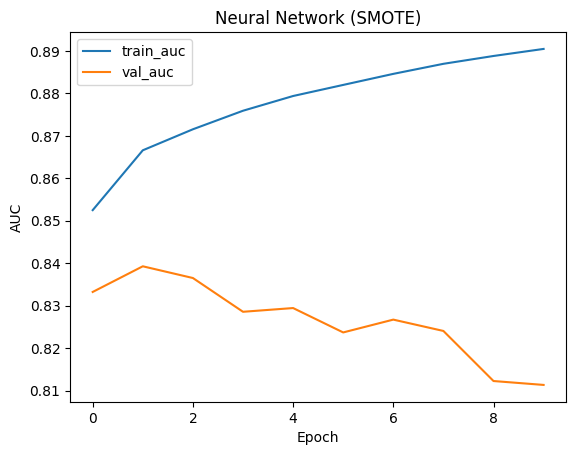

In [42]:
plt.title("Neural Network (SMOTE)")
plt.plot(history.history["auc"], label="train_auc")
plt.plot(history.history["val_auc"], label="val_auc")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()

In [43]:
y_pred_proba = model_smote.predict(mortality_x_test)

621/621 ━━━━━━━━━━━━━━━━━━━━ 1s 924us/step


In [44]:
y_pred = np.where(y_pred_proba >= 0.5, 1, 0)

In [45]:
f1_score(mortality_y_test, y_pred)

0.33271281096632255

In [46]:
fpr, tpr, _ = roc_curve(mortality_y_test, y_pred_proba)
auc(fpr, tpr)

0.8114351829085047

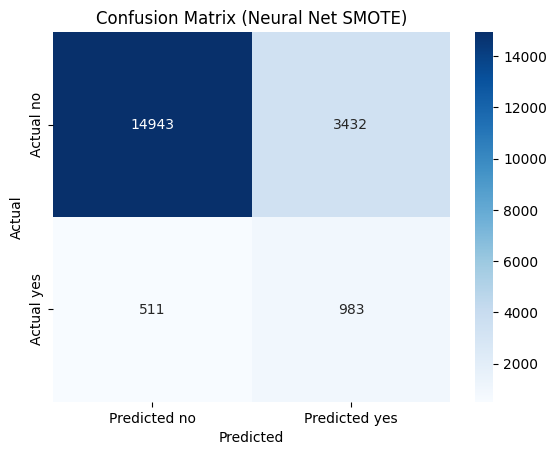

In [47]:
conf_mat = pd.DataFrame(confusion_matrix(mortality_y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Neural Net SMOTE)')
plt.show()

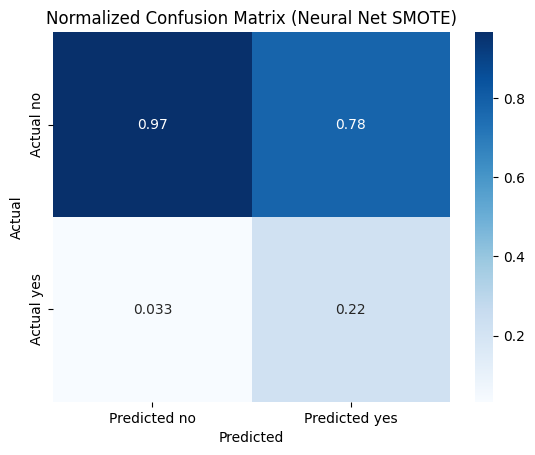

In [48]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Neural Net SMOTE)')
plt.show()

In [49]:
precision, recall, _ = precision_recall_curve(mortality_y_test, y_pred_proba)

In [50]:
model_evaluations["Neural Net SMOTE"] = {
    "fpr": fpr,
    "tpr": tpr,
    "precision": precision,
    "recall": recall
}

## Comparisons

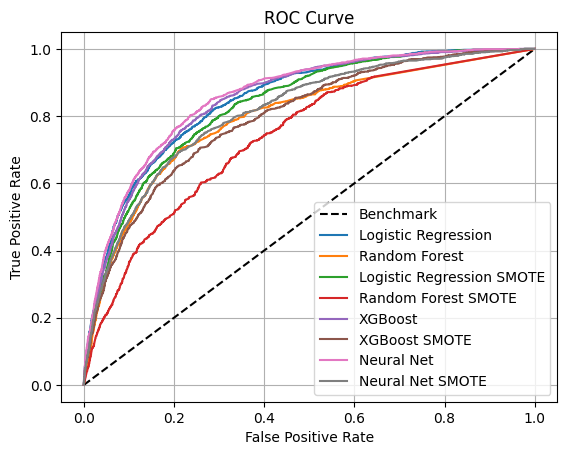

In [51]:
# ROC curve
plt.plot([0, 1], [0, 1], 'k--', label='Benchmark')

for model_name in model_evaluations:
    plt.plot(model_evaluations[model_name]['fpr'], model_evaluations[model_name]['tpr'], label=model_name)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

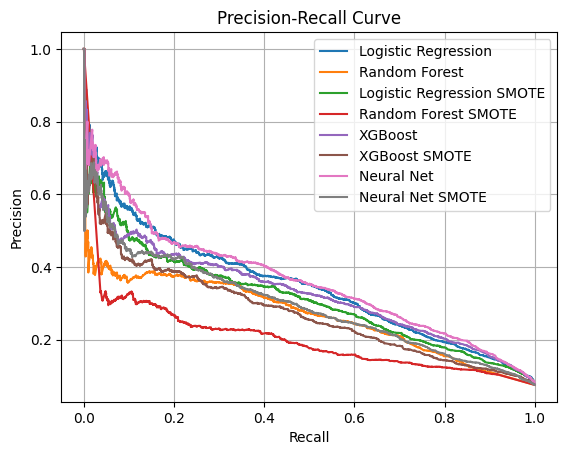

In [52]:
# Precision-Recall curve
for model_name in model_evaluations:
    plt.plot(model_evaluations[model_name]['recall'], model_evaluations[model_name]['precision'], label=model_name)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

In [53]:
# coeff
coeffs = pd.DataFrame({
    'Feature': mortality_x_train.columns,
    'Coefficient': simple_models['Logistic Regression'].coef_[0]
})
coeffs

,Feature,Coefficient
0,GENDER,0.348229
1,Anemia category,0.461874
2,PreopEGFRMDRD,0.508032
3,AnaestypeCategory,-0.183462
4,PriorityCategory,0.351880
5,AGEcategory,0.389031
6,SurgRiskCategory,0.268945
7,CVARCRICategory,-0.005097
8,IHDRCRICategory,-0.132634
9,CHFRCRICategory,0.365065


# ICU
TBD

# Thirty Days Mortality
TBD